In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data
book=pd.read_csv(r"C:\Users\Mandar\Downloads\book (1).csv",encoding = 'ISO-8859-1')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
#we dont need 1st column so we focus on remaining columns only
books=book.iloc[:,1:]
books

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [5]:
# Sort by User IDs
books.sort_values(['User.ID'])

,User.ID,Book.Title,Book.Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


here user.ID 8 was read "Wings","The Western way: A practical guide to the West...","Ancient Celtic Romances","Truckers","The Art Of Celtia" these 5 books and gave them rating 5&7 as respectively,as well userID 278854 was read the 5 books and gave them rating 6,7,&8 as respectively

In [6]:
# Renaming the column
books = books.rename({'User.ID':'UserId','Book.Title':'Title','Book.Rating':'Rating'}, axis=1)
books

,UserId,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [34]:
# Count the number of duplicates between user_id and title
books[books.duplicated(subset=['UserId', 'Title'])].count()

UserId    0
Title     0
Rating    0
dtype: int64

 Here,shows that there are 0 rows with duplicated combinations of 'UserId' and 'Title'. This suggests that each user in the dataset has rated each book only once. There are no repeated ratings for the same book by the same user in the dataset. 

In [7]:
# Number of UserId ,Title and Ratings
books.nunique()

UserId    2182
Title     9659
Rating      10
dtype: int64

1)There are 2182 unique user IDs in the dataset. Each user ID likely represents a different user who has interacted with the system in some way,such as rating or reviewing books.

2)There are 9659 unique titles in the dataset. This indicates the variety of books present in the dataset.

3)There are 10 unique ratings in the dataset.range from 1 to 10
   

In [8]:
# Number of Ratings ad counts
books['Rating'].value_counts().sort_index()

Rating
1       43
2       63
3      146
4      237
5     1007
6      920
7     2076
8     2283
9     1493
10    1732
Name: count, dtype: int64

1)Here 43 users gave 1 rating to a diffrent books which was they read.
  same as 63 users,146users,273users,1007users,920users,2076users,2283users,1493users,1732users gave 2,3,4,5,6,7,8,9,&10 rating respectively. 

<Axes: xlabel='Rating'>

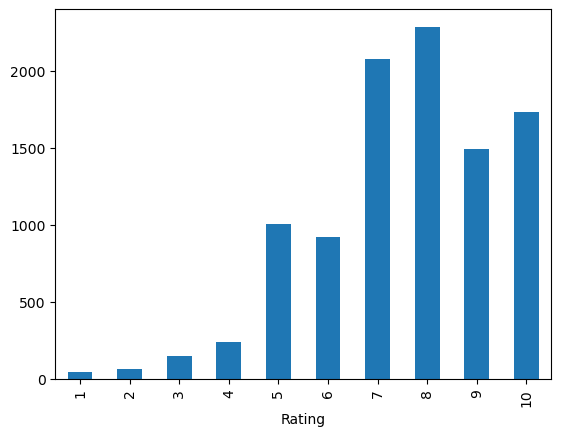

In [9]:
# Plotting the rating in the barplot
books['Rating'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Rating', ylabel='Density'>

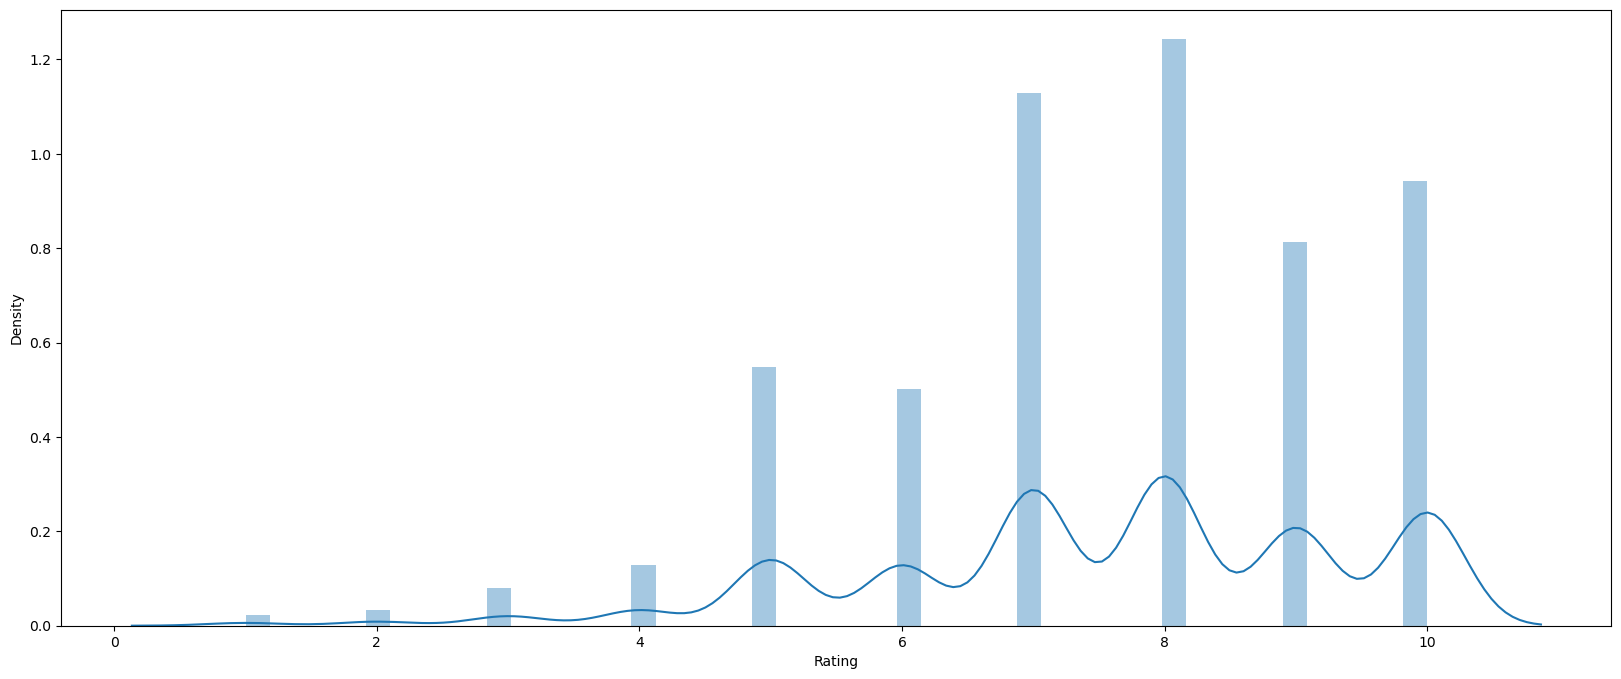

In [36]:
plt.figure(figsize=(20,8))
sns.distplot(books.Rating)

1)The most common rating is 8,followed closely by ratings of 7 and 10,On the lower end, ratings of 1 and 2 are the least common among users.

2)Ratings of 5 and 6 are relatively neutral in this dataset. They are not the most common ratings, but they are also not the least common. This suggests that a significant portion of users neither strongly liked nor disliked the books they rated.

3)The distribution indicates that a substantial number of users gave ratings between 7 and 10. This suggests that a majority of users had positive experiences with the books they interacted with, as they rated them in the higher range.

4)While positive ratings are prevalent, there are still users who gave ratings of 1 to 4. Understanding the feedback provided by these users can be crucial for improving the quality of the books or services offered.

In [11]:
# Converting long data into wide data using pivot table
books2=books.pivot_table(index='UserId',columns='Title',values='Rating').reset_index(drop=True)
books2

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Replacing the index values by unique UserId
books2.index=books['UserId'].unique()
books2

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
162121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Impute those NaNs with 0 values
books2.fillna(0,inplace=True)
books2

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Calculating Cosine Similarity between Users on array data
user_sim=1-pairwise_distances(books2.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

1)The diagonal of the matrix contains 1.0, indicating perfect similarity between a user and themselves, which is expected. Users are perfectly similar to themselves, resulting in a cosine similarity of 1.

2)Most of the off-diagonal values are 0, indicating low similarity between users. This suggests that users in your dataset have diverse preferences, meaning they tend to interact with different sets of books. There might not be strong correlations between the reading preferences of different users.

3)The matrix is predominantly filled with 0s, indicating sparsity in the user interactions. In many real-world scenarios, users only interact with a small subset of items available, leading to sparse data matrices. Sparse matrices can pose challenges in recommendation systems, and techniques like matrix factorization or collaborative filtering are often used to handle sparsity.

4)Users who have entirely dissimilar reading habits have cosine similarity scores of 0, indicating no similarity in their interactions with books. These users might have distinct interests, making it difficult to find meaningful connections between their preferences.

In [15]:
# Store the results in a dataframe format
user_sim2=pd.DataFrame(user_sim)
user_sim2

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Set the index and column names to UserId
user_sim2.index=books['UserId'].unique()
user_sim2.columns=books['UserId'].unique()
user_sim2

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Nullifying diagonal values
np.fill_diagonal(user_sim,0)
user_sim2

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Most Similar Users
user_sim2.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

1)User 276726 is the most similar user for a significant portion of the dataset. This suggests that user 276726 has preferences or behaviors that align closely with many other users. This could imply that this user represents a central or typical user in your dataset.

2)Users like 161453 (found in row 162113) represent exceptions in the dataset, having the most similar user different from the majority.

3)Users with the same most similar user might belong to specific user segments or groups with similar tastes. Understanding these groups can aid in targeted advertising, product recommendations, or content personalization.

4)For collaborative filtering recommendation systems, we can use these most similar users to provide personalized recommendations. Users similar to each other might appreciate similar products or content.

In [19]:
# extract the books which userId  276813 have watched
id1=books[books['UserId']== 276813]
id1

,UserId,Title,Rating
44,276813,Icebound,8
45,276813,I'll Be Seeing You,8
46,276813,From the Corner of His Eye,6
47,276813,Isle of Dogs,8
48,276813,Purity in Death,6
49,276813,This Year It Will Be Different: And Other Stories,6
50,276813,Proxies,8


1)The user has rated a variety of books, suggesting a diverse range of interests or genres. The genres or topics of these books could provide insights into the user's reading preferences.

2)The user has given consistent ratings to the books, with ratings ranging from 6 to 8. This suggests a certain level of consistency in their evaluation criteria or their overall satisfaction with the books they have read.

3)All the books have received ratings above 5, indicating that the user found each of these books at least moderately enjoyable or satisfactory.

4)The specific book titles likes "Icebound," "I'll Be Seeing You," "From the Corner of His Eye," "Isle of Dogs," "Purity in Death," and "This Year It Will Be Different: And Other Stories" can be used to identify popular or well-known books in the dataset. Analyzing these specific books might reveal common themes or characteristics that appeal to this user.

5)Based on the books this user has rated positively, you could recommend similar books or books from the same genres to enhance user engagement and satisfaction.

In [20]:
# extract the books which userId 8 have watched
id2=books[books['UserId']==8]
id2

,UserId,Title,Rating
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5
2402,8,Truckers,5
2403,8,Keepers of the Earth Teachers Guide,6
2404,8,The Celts Activity Book,6
2405,8,The Art Of Celtia,7


1) The user has consistently rated the books with ratings ranging from 5 to 7. This suggests that the user has a specific criterion for rating books, and most likely, they have found all these books moderately enjoyable or satisfactory.

2)The specific book titles ("Ancient Celtic Romances," "The Western way: A practical guide to the West...", "Wings," "Truckers," "Keepers of the Earth Teachers Guide," "The Celts Activity Book," and "The Art Of Celtia") provide insight into the genres or topics that appeal to this user. These titles might indicate an interest in Celtic culture, practical guides, and possibly educational materials related to Earth and Celtic art.

3)The presence of titles like "Keepers of the Earth Teachers Guide" and "The Celts Activity Book" suggests an interest in educational or instructional materials. This user might be an educator, student, or someone interested in learning about specific topics.

4)Based on the user's interest in Celtic culture and educational materials, you could recommend similar books or resources within these categories to enhance user engagement.

In [21]:
# extract the books which userId 276813 & 8 have watched
books[(books['UserId']==276813) | (books['UserId']==8)]

,UserId,Title,Rating
44,276813,Icebound,8
45,276813,I'll Be Seeing You,8
46,276813,From the Corner of His Eye,6
47,276813,Isle of Dogs,8
48,276813,Purity in Death,6
49,276813,This Year It Will Be Different: And Other Stories,6
50,276813,Proxies,8
2399,8,Ancient Celtic Romances,5
2400,8,The Western way: A practical guide to the West...,5
2401,8,Wings,5


1) Both users have diverse reading interests as indicated by the variety of book titles they have rated.

2) Both users have given consistent ratings, with ratings ranging from 5 to 8. This suggests that both users have specific criteria for rating books, and they have found the books they rated to be moderately to highly enjoyable.

3) All the books in the extracted data have received ratings above 5, indicating that both users found these books at least moderately enjoyable or satisfactory.

In [37]:
id1.Title

44                                             Icebound
45                                   I'll Be Seeing You
46                           From the Corner of His Eye
47                                         Isle of Dogs
48                                      Purity in Death
49    This Year It Will Be Different: And Other Stories
50                                              Proxies
Name: Title, dtype: object

In [38]:
id2.Title

2399                              Ancient Celtic Romances
2400    The Western way: A practical guide to the West...
2401                                                Wings
2402                                             Truckers
2403                  Keepers of the Earth Teachers Guide
2404                              The Celts Activity Book
2405                                    The Art Of Celtia
Name: Title, dtype: object

In [23]:
# Extract the books which userId 162113 & 276736 have watched
books[(books['UserId']==162113) | (books['UserId']==276736)]

,UserId,Title,Rating
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
9989,162113,The Cape Ann (Contemporary American Fiction),8


1)Both users have given a rating of 8 to the books they have watched. This suggests that these users found the respective books highly enjoyable or satisfying.

2)The specific titles of the books ("Flu: The Story of the Great Influenza Pandemic..." and "The Cape Ann (Contemporary American Fiction)") indicate diverse reading interests. One book appears to be related to historical events (influenza pandemic), while the other falls under contemporary American fiction. This suggests that the users have a range of interests in different genres or topics.

3)Given their high ratings, these books could be used as a starting point to recommend similar titles or books from similar genres to both users. Analyzing other books with similar themes or styles might help in providing more tailored recommendations to enhance user engagement.

4)Both users have engaged with the platform by rating books, indicating an active interest in reading or consuming content.

5)Platforms can leverage this engagement data to provide more personalized recommendations, enhancing user satisfaction and retention.

In [24]:
# Extract the books which userId 162113 & 162115 have watched
books[(books['UserId']==162113) | (books['UserId']==162115)]

,UserId,Title,Rating
9989,162113,The Cape Ann (Contemporary American Fiction),8


1)User 162113 has given a high rating of 8 to the book "The Cape Ann." This indicates that this user found the book highly enjoyable or satisfying.

2) The dataset provides only one entry for User 162113,It means user 162115 is nott watched any book.

In [39]:
pd.merge(id1,id2,on='Title',how='outer')

,UserId_x,Title,Rating_x,UserId_y,Rating_y
0,276813.0,Icebound,8.0,NaN,NaN
1,276813.0,I'll Be Seeing You,8.0,NaN,NaN
2,276813.0,From the Corner of His Eye,6.0,NaN,NaN
3,276813.0,Isle of Dogs,8.0,NaN,NaN
4,276813.0,Purity in Death,6.0,NaN,NaN
5,276813.0,This Year It Will Be Different: And Other Stories,6.0,NaN,NaN
6,276813.0,Proxies,8.0,NaN,NaN
7,NaN,Ancient Celtic Romances,NaN,8.0,5.0
8,NaN,The Western way: A practical guide to the West...,NaN,8.0,5.0
9,NaN,Wings,NaN,8.0,5.0


1)The merged DataFrame shows the overlap in books that both users have watched. Books like "Ancient Celtic Romances," "The Western way: A practical guide to the West...," "Wings," and others were watched by User id2 and not by Userid1.

2)Books like "Icebound," "I'll Be Seeing You," and others were watched by User id1 and not by User  id2.

3)NaN values in the DataFrame indicate missing ratings where a user did not rate a specific book. Handling these missing values is important for accurate analysis, especially when making recommendations or drawing conclusions about user preferences.

4)Books like "Icebound," "I'll Be Seeing You," and others were watched by User id1 and not by User  id2.

# Considering most similar User

In [26]:
def get_recommendation(customer_id):
        
        tem=list(user_sim2.sort_values([customer_id],ascending=False).head(3).index)

        book_list=list(books[books['UserId'].isin(tem)]['Title'])

        recommended_books = set(book_list)-set(books[books['UserId']==customer_id]['Title'])
        
        return recommended_books

In [27]:
get_recommendation(162113)

{'Bread, Tomato, Garlic: Quick Cooking With 3 Main Ingredients',
 'Cinnamon (Shooting Stars)',
 'Classical Mythology',
 'Home Song',
 'Spring Fancy',
 'Surrender',
 'Surrender to Love (Avon Historical Romance)',
 "The Ubiquitous Shrimp: From Simple to Exotic, from Feasts to Snacks, All the Wonderful Ways to Savor America's Favorite Seafood"}

1)The set of recommended books covers a range of genres and topics, including cooking,romance,classical mythology,and general fiction this diversity suggest an attemp to cater to dufferentintrest of the user,indicating broad range of potential reading preferences.

2)The recommendations cover both culinary interests and leisure reading.This indicates that the user might have a multifaceted reading test,appreciating both informative and imaginative content.

3)The selection of books for recommendations seems personalized, taking into account the user's varied interests. This personalized approach is essential for user engagement, as it increases the likelihood that the user will find the recommendations relevant and appealing.

4)Providing tailored and diverse recommendations can enhance user engagement by catering to different moods or interests. Users are more likely to engage with a platform that understands their preferences and offers content that aligns with their tastes.

In [28]:
get_recommendation(276813)

{'A Man of Steel',
 'Dance the Eagle to Sleep',
 'The Apprentice',
 'The Seventh Night'}

1)The recommended books, including titles like "A Man of Steel," "Dance the Eagle to Sleep," "The Apprentice," and "The Seventh Night," cover various genres and themes. This suggests that the user, 276813, has diverse reading preferences and may enjoy exploring different types of literature.

2)The titles provided "Dance the Eagle to Sleep," "The Apprentice," "The Seventh Night" hint at a potential interest in fiction. These titles are likely novels or narrative-driven books, indicating a preference for immersive storytelling.

3)Titles like "Dance the Eagle to Sleep" and "The Apprentice" might belong to genres like thriller, suspense, or mystery, as these titles often imply intriguing or suspenseful plots. If the user enjoys these genres, they might appreciate similar suspenseful books in the future.

4)he recommendation of "A Man of Steel" suggests a possibility of interest in literature related to strong characters or possibly superhero themes, considering the title's reference to "steel.

5)Given the diverse range of genres in the recommendations, there is an opportunity to refine the recommendations further. For example, if the user particularly enjoys suspenseful novels, providing more recommendations within the thriller or mystery genres might lead to a higher user engagement rate.